In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [2]:
with open('location.pickle','rb') as read_file:
    location = pickle.load(read_file)

In [44]:
location.longitude.max()

-72.02588399999999

In [5]:
train, test = train_test_split(location, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
lm_loc = LogisticRegression(solver='newton-cg', C=100000) 
lm_loc.fit(train[['latitude','longitude']], train['paid'])

# We can see that the coefficient in question matches the one from statsmodels
print('intercept: ', round(lm_loc.intercept_[0], 4))
print('coef: ', round(lm_loc.coef_[0][0], 4))

intercept:  6.0419
coef:  2.3309


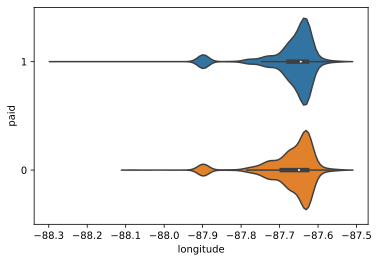

In [15]:
sns.violinplot(x='longitude',
               y='paid',
               data=train);

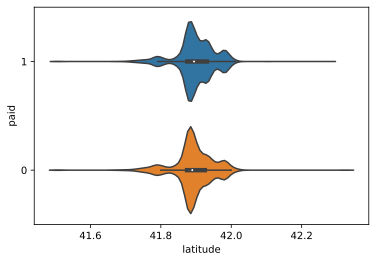

In [14]:
sns.violinplot(x='latitude',
               y='paid',
               data=train);

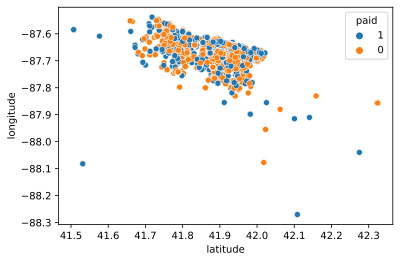

In [17]:
sns.scatterplot(data=train,
                x='latitude',
                y='longitude',
                hue='paid');

In [26]:
test_c = test.copy()
test_c['pred'] = lm_loc.predict(test[['latitude','longitude']])
test_c.loc[:, 'pred'] = test_c['pred'].astype('category')
test_c['correct_pred'] = test_c['pred'] == test_c['paid']

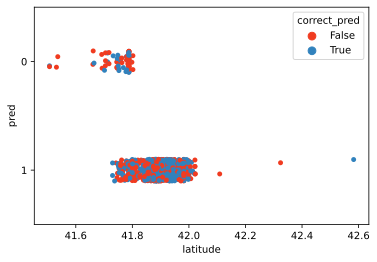

In [27]:
sns.stripplot(data=test_c,
              x='latitude',
              y='pred',
              hue='correct_pred',
              palette={False: '#f03b20', True: '#3182bd'});

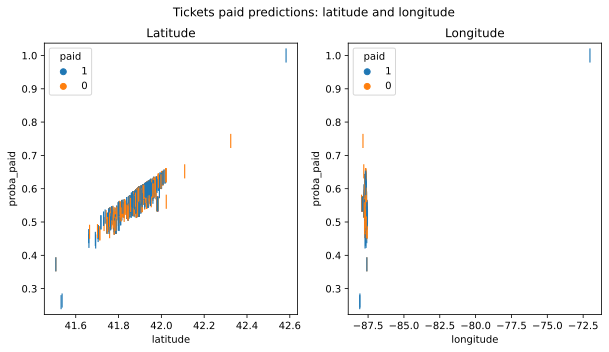

In [32]:
# This is the same model but with proba (returns probabilities instead of class)
test_c['proba_paid'] = lm_loc.predict_proba(test_c[['latitude','longitude']])[:, 1]


fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,5))
fig.suptitle('Tickets paid predictions: latitude and longitude')
axes[0].set_title('Latitude')
axes[1].set_title('Longitude')

sns.scatterplot(data=test_c,
                ax=axes[0],
                x='latitude',
                y='proba_paid',
                hue='paid',
                marker='|',
                s=200);
sns.scatterplot(data=test_c,
                ax=axes[1],
                x='longitude',
                y='proba_paid',
                hue='paid',
                marker='|',
                s=200);

In [33]:
cf_matrix = confusion_matrix(test_c['paid'], test_c['pred'])
cf_matrix

array([[  29,  750],
       [  54, 1079]], dtype=int64)

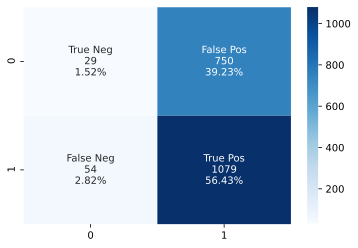

In [34]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(data_test['status'], preds), 
                                                     recall_score(data_test['status'], preds),f1_score(data_test['status'], preds, zero_division=1)))

In [95]:
test_c['ticket_queue'].astype('int32').dtypes
mvp_eval['ticket_queue'].value_counts()

1    1004
0     622
Name: ticket_queue, dtype: int64

In [36]:
lm_loc.predict_proba(test[['latitude','longitude']])[:5]

array([[0.44143809, 0.55856191],
       [0.44235897, 0.55764103],
       [0.49370858, 0.50629142],
       [0.39274183, 0.60725817],
       [0.42710318, 0.57289682]])

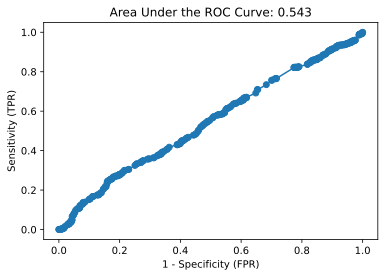

In [40]:
def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)
    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");
    
test_c['proba_pay'] = lm_loc.predict_proba(test_c[['latitude','longitude']])[:, 1]
fpr, tpr, thresholds = roc_curve(test_c['paid'],test_c['proba_pay'],pos_label='1')


plot_roc(test_c['paid'], test_c['proba_pay'])

In [38]:
mask = tpr > 0.9
thresholds[mask].max()


0.5373355707150865

## Multiple features: Logistic Regression

In [65]:
with open('table.pickle','rb') as read_file:
    data = pickle.load(read_file)  
    
data.dropna(inplace=True)
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [4]:
with open('train.pickle','rb') as read_file:
    data_train = pickle.load(read_file)
with open('test.pickle','rb') as read_file:
    test = pickle.load(read_file)

In [5]:
data_train.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,code_0980110,code_0980120,code_0980130,code_0980220,code_1141115,code_1520270,hearing,value,longitude,latitude
0,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,NaN,...,0,0,0,0,0,0,0,50,-87.692567,41.997949
1,32807228,2000-09-21 21:45:00,633 E SOLIDARITY,c3f0ddfbd8ee6628578e9c302e0c4d4a24aa5b0fe376f7...,TN,PAS,000000000,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,24,...,0,0,0,0,0,0,0,30,-87.613374,41.865965
2,9061102579,1999-10-08 07:57:00,1975 E 73RD ST,e943fd42d5c696f249032b8e18ebe75859f3ce575d12d4...,IL,PAS,606280000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,498,...,0,0,0,0,0,0,0,30,-87.578981,41.762668
3,32807221,2000-09-21 21:18:00,633 E SOLIDARITY,351856bd93281b32c9c66e4c3cd623e0a58a981bd93828...,IA,PAS,000000000,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,24,...,0,0,0,0,0,0,0,30,-87.613374,41.865965
4,33939512,2000-09-21 21:20:00,835 N MICHIGAN,4c5958c866f6c83037fa29eea8a7d2a05f77bd40eee23b...,KY,PAS,608050000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,...,0,0,0,0,0,0,0,50,NaN,NaN


In [67]:
features = ['state', 'value','longitude','latitude']

# Since we're using more than one feature, let's scale our features
scaler = StandardScaler()
X_train = scaler.fit_transform(data_train[features])
y_train = data_train['status']

In [68]:
lm_2 = LogisticRegression() 
lm_2.fit(X_train, y_train)

LogisticRegression()

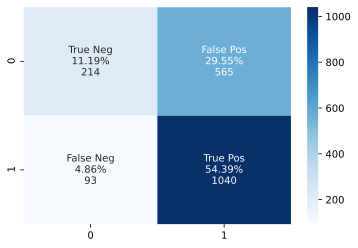

In [104]:
X_test = scaler.transform(data_test[features])
preds = lm_2.predict(X_test)

cf_matrix2 = confusion_matrix(data_test['status'], preds)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_percentages,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap=plt.cm.Blues);

In [82]:
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(data_test['status'], preds), 
                                                     recall_score(data_test['status'], preds),f1_score(data_test['status'], preds, zero_division=1)))

Precision: 0.6480,   Recall: 0.9179,   F1: 0.7597


In [79]:
proba_paid = lm_2.predict_proba(data_test[features])[:, 1]
fpr, tpr, thresholds = roc_curve(data_test['status'], proba_paid, pos_label='1')


plot_roc(data_test[['status']], proba_paid)

C:\Users\ejfel\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:572: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = (y_true == pos_label)


TypeError: 'bool' object is not subscriptable

## K Nearest Neighbors Models

In [84]:
import itertools
from sklearn import metrics
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier


Train set Accuracy:  0.645005230125523
Test set Accuracy:  0.5988493723849372


### Let's take a quick look at a KNN model based on the four closest neighbors

In [99]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(data_train[features],data_train['status'])
yhat = neigh.predict(data_test[features])
print("Train set Accuracy: ", metrics.accuracy_score(data_train['status'], neigh.predict(data_train[features])))
print("Test set Accuracy: ", metrics.accuracy_score(data_test['status'], yhat))

Train set Accuracy:  0.645005230125523
Test set Accuracy:  0.5988493723849372


### Diving deeper and evaluating other KNN across values of k and multiple metrics

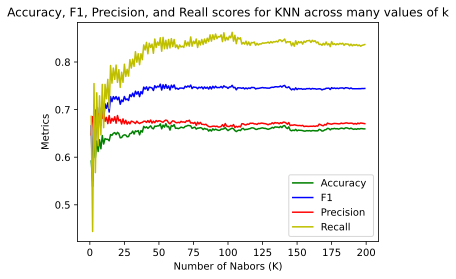

In [103]:
Ks = 200
mean_acc = np.zeros((Ks-1))
mean_f1 = np.zeros((Ks-1))
mean_prec = np.zeros((Ks-1))
mean_recall = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(data_train[features],data_train['status'])
    yhat = neigh.predict(data_test[features])
    mean_acc[n-1] = metrics.accuracy_score(data_test['status'], yhat)
    mean_f1[n-1]= f1_score(data_test['status'], yhat, zero_division=1)
    mean_prec[n-1] = precision_score(data_test['status'], yhat)
    mean_recall[n-1] = recall_score(data_test['status'], yhat)
    
    
#     std_acc[n-1]=np.std(yhat==data_test['status'])/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),mean_f1,'b')
plt.plot(range(1,Ks),mean_prec,'r')
plt.plot(range(1,Ks),mean_recall,'y')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_f1 - 1 * std_acc,mean_f1+ 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_prec - 1 * std_acc,mean_prec+ 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_recall - 1 * std_acc,mean_recall+ 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ','F1','Precision','Recall'))
plt.ylabel('Metrics')
plt.xlabel('Number of Nabors (K)')
plt.title('Accuracy, F1, Precision, and Reall scores for KNN across many values of k')
plt.tight_layout()
plt.show()

In [97]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print( "The best F1 Score was with", mean_f1.max(), "with k=", mean_f1.argmax()+1) 
print( "The best precision was with", mean_prec.max(), "with k=", mean_prec.argmax()+1) 
print( "The best recall was with", mean_recall.max(), "with k=", mean_recall.argmax()+1) 

The best accuracy was with 0.6705020920502092 with k= 55
The best F1 Score was with 0.7534193044157874 with k= 51
The best precision was with 0.6989130434782609 with k= 4
The best recall was with 0.8614298323036187 with k= 97


In [72]:

from sklearn.linear_model import LogisticRegressionCV

0.7596785975164354

In [ ]:
# fpr, tpr, thresholds = roc_curve(mvp2_eval['in_sf'],
#                                  df_eval['proba_sf'])
